nltk를 사용하여 영문 분석을 해보자. 우선 설치가 되어있는지 확인을 하고, 임포트를 한다.

In [6]:
# ! pip install nltk

In [7]:
import nltk

In [8]:
nltk.download('book', quiet=True)

True

nltk가 가지고 있는 말뭉치를 가지고 와보자.
쿠텐베르그 필드 가지고 오기

In [9]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

말뭉치 - 텍스트 분석을 위해 가공해놓은 데이터들을 부름
제인 오스틴의 Emma에서 emma_raw 하면 하나의 긴 문자열(str)로 한줄씩 나와(리스트 아님). .raw()는 텍스트를 가공 안 된 원문 문자열(str) 로 가져옴.
소설 Emma 전체 원문을 그대로 가져온 것. -> 덩어리 텍스트를 가지고 와서 가공 시작

In [10]:
emma_raw=nltk.corpus.gutenberg.raw('austen-emma.txt')
emma_raw

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister\'s marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse\'s family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice o

word로 token생성
토큰을 생성하는 라이브러리가 필요함.


In [11]:
nltk.download('punkt_tab') #nltk 최신버전일 때 추가
from nltk.tokenize import sent_tokenize
sent_tokenize=sent_tokenize(emma_raw)
sent_tokenize[0:5]

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\it\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

단어단어를 공백 기준으로 쪼개보자. 보고 있으면 쓸모 없는 것들이 많다.
word를 공백으로 쪼개다보니까 불필요한 단어들이 보여.
word_tokenize를 emma_raw 라는 텍스트를 감싸주면 단어별로 쪼개줘

In [12]:
from nltk.tokenize import word_tokenize
print(word_tokenize(emma_raw)[:100])

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'s", 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.', 'Her', 'mother', 'had', 'died']


특정한 정규식을 짜서 토큰을 생성하겠다 -> 필요한 정보만 가지고 오려고!
정규표현식에서 []는 선택한다는 의미. [\w] 문자가 1자 이상인 구분된 word로 골라내겠다. [:1000] 개 보여주겠다.

In [13]:
from nltk.tokenize import RegexpTokenizer
regToken = RegexpTokenizer('[\w]+') #문자 한자 이상을 분석 단위로 잡겠다.capitalize
regToken.tokenize(emma_raw[:100])

['Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a']

-----------------------------------------------

어간 추출을 해보자

In [14]:
from nltk.stem import PorterStemmer, LancasterStemmer
st1 = PorterStemmer() #각각 객체를 만들어
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']

list1=[]
for w in words:
  print(st1.stem(w), st2.stem(w)) # 2방법으로 어간 추출한 결과를 출력하겠다.
  list1.append([st1.stem(w), st2.stem(w)])
print(list1)
list1=[st1.stem(w) for w in words]
list2=[st2.stem(w) for w in words]
print(list1)
print(list2)
 

fli fly
fli fli
fli fly
flew flew
flown flown
[['fli', 'fly'], ['fli', 'fli'], ['fli', 'fly'], ['flew', 'flew'], ['flown', 'flown']]
['fli', 'fli', 'fli', 'flew', 'flown']
['fly', 'fli', 'fly', 'flew', 'flown']


추가개념) 리스트 컴플리헨션?? 리스트를 간단하게 하는 것 if문에서도 써야해.

In [15]:
list2=[]
for i in range(10):
  list2.append(i)
list2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [16]:
list2=[i for i in range(10)]
list2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

단어의 원형 복원

In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4') #원형 복원하는 여러개 중에 

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\it\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
lm = WordNetLemmatizer()
v1 = [lm.lemmatize(w, 'v') for w in words] # w를 원형으로 하겠다. 원형 만들어진건 v1으로 들어간다.
print(v1)

['fly', 'fly', 'fly', 'fly', 'fly']


어떤 문장에서 품사를 태깅해서 고유명사만 가지고 온다, 명사를 가지고 온다, 명사와 동사만 가지고 온다.
이런 작업을 할 수 있어!

In [19]:
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger_eng')

sentence=emma_raw[:1000]
# sentence # 앞에 문자 1000자만 나와
tagged_list = pos_tag(regToken.tokenize(sentence)) #regToken 정규표현식 하면 문자만 가지고 와
tagged_list #튜플로 받은 거임 튜플 0에는 단어, 1에는 품사

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\it\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('Emma', 'NN'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 ('handsome', 'VBD'),
 ('clever', 'NN'),
 ('and', 'CC'),
 ('rich', 'JJ'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty', 'JJ'),
 ('one', 'CD'),
 ('years', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP$'),
 ('She', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('youngest', 'JJS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('

고유명사 찾자
튜플 1에 NNP 인 것만 명사리스트에 넣어달라. 첫자가 대문자인 것을 고유명사로 인식을 해.

In [20]:
noun_list=[t[0] for t in tagged_list if t[1]=='NNP'] 
noun_list


['Jane',
 'Austen',
 'VOLUME',
 'Emma',
 'Woodhouse',
 'Sixteen',
 'Miss',
 'Taylor',
 'Mr',
 'Woodhouse',
 'Emma',
 'Between',
 'Miss',
 'Taylor']

명사인것과 명사 아닌 것을 골라내
for 문 뒤에 if쓰는데 if else는 다르게 쓴다아..

if 만 있을 때, [값 for 요소 in 반복 if 조건]

if-else 만 있을 때, [값1 if 조건 else 값2 for 요소 in 반복]


In [ ]:
noun_list=[t[0] if t[1]=='NN' else '-' for t in tagged_list]

#명사가 아닌 것을 -로,
noun_list


['Emma',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'clever',
 '-',
 '-',
 '-',
 '-',
 '-',
 'home',
 '-',
 '-',
 'disposition',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'existence',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'world',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'indulgent',
 'father',
 '-',
 '-',
 '-',
 'consequence',
 '-',
 '-',
 'sister',
 's',
 'marriage',
 '-',
 'mistress',
 '-',
 '-',
 'house',
 '-',
 '-',
 '-',
 '-',
 'period',
 '-',
 'mother',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'remembrance',
 '-',
 '-',
 '-',
 '-',
 '-',
 'place',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'woman',
 '-',
 'governess',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'mother',
 '-',
 'affection',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'family',
 '-',
 '-',
 '-',
 'governess',
 '-',
 '-',
 '-',
 '-',
 

Text 객체
토큰화된 텍스트 데이터를 분석하고 탐색하기 위한 클래스
단어리스트(토큰리스트)를 감싸서, 다양한 자연어 처리(NLP) 기능을 쉽게 사용 할 수있게 해주는 도구

In [23]:
from nltk import Text

text=Text(regToken.tokenize(emma_raw))
print(text)

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>


출현 빈도가 가장 높은 단어 10개로 차트 작성

<Axes: xlabel='Samples', ylabel='Counts'>

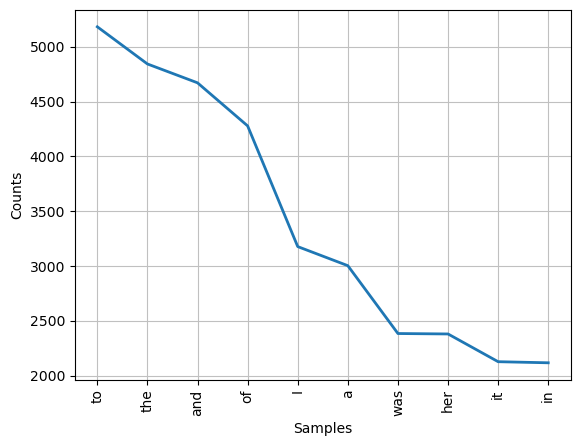

In [25]:
import matplotlib.pyplot as plt
text.plot(10)

단어들이 많이 사용되는 곳을 시각화하여 확인하는
text.dispersion_plot([w1, w2, w3...])

In [26]:
emma_taglist = pos_tag(regToken.tokenize(emma_raw))
emma_taglist

[('Emma', 'NN'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 ('handsome', 'VBD'),
 ('clever', 'NN'),
 ('and', 'CC'),
 ('rich', 'JJ'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty', 'JJ'),
 ('one', 'CD'),
 ('years', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP$'),
 ('She', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('youngest', 'JJS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('

고유명사만 뽑기

In [27]:
nnplist = [t[0] for t in emma_taglist if t[1]=='NNP']
nnplist

['Jane',
 'Austen',
 'VOLUME',
 'Emma',
 'Woodhouse',
 'Sixteen',
 'Miss',
 'Taylor',
 'Mr',
 'Woodhouse',
 'Emma',
 'Between',
 'Miss',
 'Taylor',
 'Emma',
 'Miss',
 'Taylor',
 'Emma',
 'Sorrow',
 'Miss',
 'Taylor',
 'Miss',
 'Taylor',
 'Emma',
 'Mr',
 'Weston',
 'Miss',
 'Taylor',
 'A',
 'Isabella',
 'How',
 'Emma',
 'Mrs',
 'Weston',
 'Miss',
 'Taylor',
 'Mr',
 'Woodhouse',
 'Her',
 'London',
 'October',
 'November',
 'Hartfield',
 'Christmas',
 'Isabella',
 'Highbury',
 'Hartfield',
 'Miss',
 'Taylor',
 'Emma',
 'Matrimony',
 'Miss',
 'Taylor',
 'Miss',
 'Taylor',
 'Hartfield',
 'Emma',
 'Poor',
 'Miss',
 'Taylor',
 'Mr',
 'Weston',
 'Mr',
 'Weston',
 'Miss',
 'Taylor',
 'A',
 'How',
 'Randalls',
 'No',
 'James',
 'Mr',
 'Weston',
 'Mr',
 'Weston',
 'James',
 'Randalls',
 'Hannah',
 'Nobody',
 'Hannah',
 'James',
 'James',
 'Whenever',
 'Miss',
 'Taylor',
 'Whenever',
 'James',
 'Emma',
 'Mr',
 'Knightley',
 'Isabella',
 'Highbury',
 'London',
 'Hartfield',
 'Brunswick',
 'Square',

출연진의 빈도를 이미지로

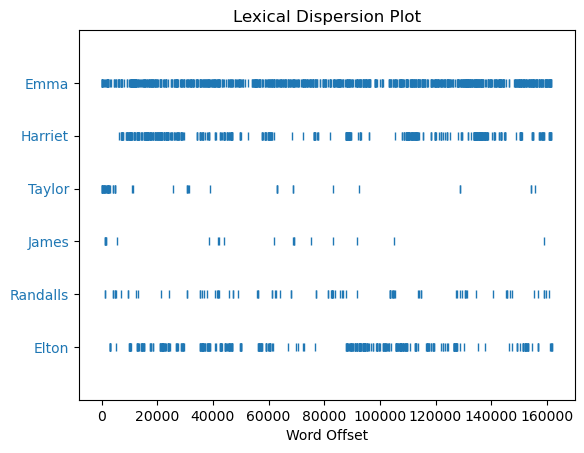

In [28]:
text.dispersion_plot(['Emma','Harriet','Taylor', 'James', 'Randalls', 'Elton'])

토큰 빈도 수를 구해보자

불용어 불포

In [30]:
from nltk import FreqDist

stopwors = ['Mr', 'Mrs', 'Miss', 'Mr', 'Mrs', 'Dear', 'A', 'No', 'Ah', 'Oh', 'VOLUME', 'Woodhouse', 'Between', 'Sixteen' ]

emma_token = pos_tag(regToken.tokenize(emma_raw))
name_list=[t[0] for t in emma_token if t[1]=='NNP']
name_list

['Jane',
 'Austen',
 'VOLUME',
 'Emma',
 'Woodhouse',
 'Sixteen',
 'Miss',
 'Taylor',
 'Mr',
 'Woodhouse',
 'Emma',
 'Between',
 'Miss',
 'Taylor',
 'Emma',
 'Miss',
 'Taylor',
 'Emma',
 'Sorrow',
 'Miss',
 'Taylor',
 'Miss',
 'Taylor',
 'Emma',
 'Mr',
 'Weston',
 'Miss',
 'Taylor',
 'A',
 'Isabella',
 'How',
 'Emma',
 'Mrs',
 'Weston',
 'Miss',
 'Taylor',
 'Mr',
 'Woodhouse',
 'Her',
 'London',
 'October',
 'November',
 'Hartfield',
 'Christmas',
 'Isabella',
 'Highbury',
 'Hartfield',
 'Miss',
 'Taylor',
 'Emma',
 'Matrimony',
 'Miss',
 'Taylor',
 'Miss',
 'Taylor',
 'Hartfield',
 'Emma',
 'Poor',
 'Miss',
 'Taylor',
 'Mr',
 'Weston',
 'Mr',
 'Weston',
 'Miss',
 'Taylor',
 'A',
 'How',
 'Randalls',
 'No',
 'James',
 'Mr',
 'Weston',
 'Mr',
 'Weston',
 'James',
 'Randalls',
 'Hannah',
 'Nobody',
 'Hannah',
 'James',
 'James',
 'Whenever',
 'Miss',
 'Taylor',
 'Whenever',
 'James',
 'Emma',
 'Mr',
 'Knightley',
 'Isabella',
 'Highbury',
 'London',
 'Hartfield',
 'Brunswick',
 'Square',

In [31]:
fd_name =FreqDist(name_list)
fd_name

FreqDist({'Mr': 1149, 'Emma': 830, 'Mrs': 698, 'Miss': 577, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, ...})

불용어들을 다 빼고 해보자!

In [32]:
from nltk import FreqDist

stopwors = ['Mr', 'Mrs', 'Miss', 'Mr', 'Mrs', 'Dear', 'A', 'No', 'Ah', 'Oh', 'VOLUME', 'Woodhouse', 'Between', 'Sixteen' ]

emma_token = pos_tag(regToken.tokenize(emma_raw))
name_list=[t[0] for t in emma_token if t[1]=='NNP' and t[0] not in stopwors]
name_list

['Jane',
 'Austen',
 'Emma',
 'Taylor',
 'Emma',
 'Taylor',
 'Emma',
 'Taylor',
 'Emma',
 'Sorrow',
 'Taylor',
 'Taylor',
 'Emma',
 'Weston',
 'Taylor',
 'Isabella',
 'How',
 'Emma',
 'Weston',
 'Taylor',
 'Her',
 'London',
 'October',
 'November',
 'Hartfield',
 'Christmas',
 'Isabella',
 'Highbury',
 'Hartfield',
 'Taylor',
 'Emma',
 'Matrimony',
 'Taylor',
 'Taylor',
 'Hartfield',
 'Emma',
 'Poor',
 'Taylor',
 'Weston',
 'Weston',
 'Taylor',
 'How',
 'Randalls',
 'James',
 'Weston',
 'Weston',
 'James',
 'Randalls',
 'Hannah',
 'Nobody',
 'Hannah',
 'James',
 'James',
 'Whenever',
 'Taylor',
 'Whenever',
 'James',
 'Emma',
 'Knightley',
 'Isabella',
 'Highbury',
 'London',
 'Hartfield',
 'Brunswick',
 'Square',
 'Knightley',
 'Isabella',
 'Knightley',
 'Dirty',
 'Look',
 'Well',
 'Who',
 'Taylor',
 'Tis',
 'Poor',
 'Taylor',
 'Emma',
 'Emma',
 'My',
 '_you_',
 'Knightley',
 '_you_',
 'Knightley',
 'Knightley',
 'Emma',
 'Emma',
 'Knightley',
 'Taylor',
 'Well',
 'Emma',
 'Every',
 '

In [33]:
fd_name =FreqDist(name_list)
fd_name

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, 'Hartfield': 160, ...})

단어수와 빈도율도 확인가능

In [37]:
print('전체 단어수:', fd_name.N())
print('주어진 단어의 빈도 확률:', fd_name.freq('Emma') )
print('주어진 단어의 빈도수:', fd_name['Emma'])

print('출현빈도가 가장 높은 단어 10개:' , fd_name.most_common(10) )

전체 단어수: 7200
주어진 단어의 빈도 확률: 0.11527777777777778
주어진 단어의 빈도수: 830
출현빈도가 가장 높은 단어 10개: [('Emma', 830), ('Harriet', 491), ('Weston', 439), ('Knightley', 389), ('Elton', 385), ('Jane', 299), ('Fairfax', 241), ('Churchill', 223), ('Frank', 208), ('Hartfield', 160)]


워드 클라우드 설치해보자!!!!

In [38]:
! pip install pillow
! pip install wordcloud

워드클라우드 실행
그림이라서 맵플롭비가 필요

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

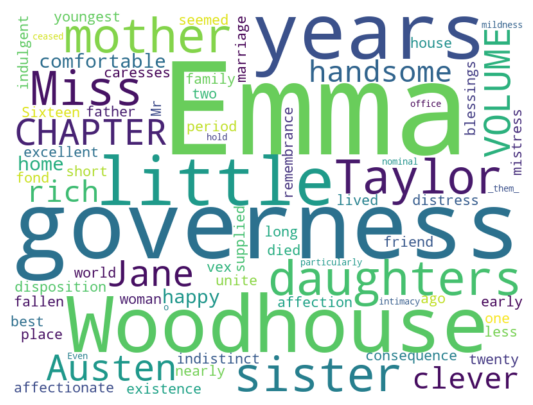

In [43]:
text = emma_raw[:1000]
# text
wordCloud = WordCloud(width=800, height=600, background_color='white').generate(text) #그림을 만들고.generate

plt.figure(figsize=(10,5))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off') #축을 없애겠다.
plt.savefig('../data4/images/wc.png') #항상 show는 맨 끝에 있어야지 저장된다!!
plt.show()

글자 크기에서 emma가 가장 빈번하게 나온다는 것을 알 수 가 있어.

이미지가 포함되게 그려보자.
네이버에서 하트를 하나 이미지 다운받아서 images 폴더에 넣었음.

In [44]:
from PIL import Image
import numpy as np


하트 모양대로 숫자가 배열되야하는데 안나왔넹

In [45]:
img = Image.open('../data4/images/img01.jpg')
mask_arr=np.array(img)
mask_arr

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

random_state=0 이걸 기준seed으로 해서 배치. seed 값이 주어지면 고정되어 나옴.

<function matplotlib.pyplot.show(close=None, block=None)>

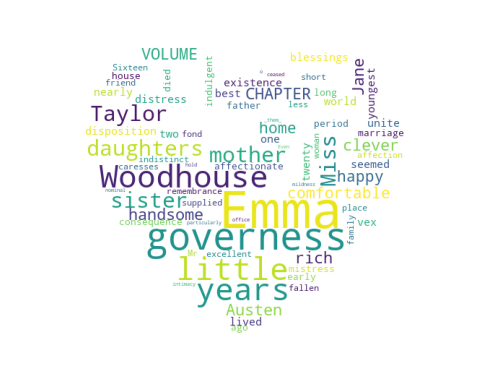

In [46]:
wc=WordCloud(width=800, height=600, background_color='white', random_state=0, mask=mask_arr)
plt.imshow(wc.generate(text))
plt.axis('off')
plt.savefig('../data4/images/wc2.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

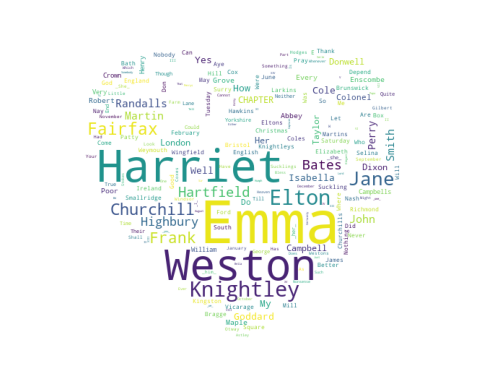

In [48]:
wc=WordCloud(width=800, height=600, background_color='white', random_state=0, mask=mask_arr)
plt.imshow(wc.generate_from_frequencies(fd_name))
plt.axis('off')
plt.savefig('../data4/images/wc3.png')
plt.show